In [73]:
!pip install imbalanced-learn
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import model_selection, naive_bayes, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter

In [61]:
df = pd.read_csv('Dataset_1_Training.csv',encoding='latin-1')

In [62]:
df = df.T
df

,0,1,2,3,4,5,6,7,8,9,...,22275,22276,22277,22278,22279,22280,22281,22282,22283,22284
ID_REF,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_22276,gene_22277,gene_22278,gene_22279,gene_22280,gene_22281,gene_22282,gene_22283,CO: 1,CO: 2
Train_01,12.444,8.3774,6.7866,10.2851,5.9064,8.3767,8.0356,6.6745,6.2325,6.845,...,15.6236,15.2785,3.2915,3.6526,2.6412,1.2652,3.069,2.0271,0.0,1.0
Train_02,12.2005,7.8592,8.0963,10.4624,4.9582,9.2973,7.0581,6.4607,6.9047,5.8878,...,15.3234,15.1286,3.3811,2.588,4.4798,4.8098,3.1637,2.4758,0.0,1.0
Train_03,12.6709,8.6762,7.4812,10.1887,5.2332,9.1721,8.6061,7.0932,6.594,5.6843,...,15.4604,15.2674,3.1665,3.9743,5.2597,4.3815,2.8034,2.4669,0.0,0.0
Train_04,11.6619,8.2557,7.9923,10.7705,6.3296,9.3777,8.4776,6.5878,6.0877,6.5169,...,15.5185,15.1655,4.0045,3.8503,5.9114,0.7882,3.1831,3.482,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Train_126,11.6268,8.0073,7.1604,9.3056,2.7648,9.0741,5.9092,5.2527,5.7626,3.187,...,16.2751,15.9577,3.7471,4.9668,2.9813,5.331,5.344,2.5358,0.0,0.0
Train_127,11.4041,8.7849,8.1964,8.5677,3.2988,9.7455,6.6631,3.9661,7.8396,6.5435,...,15.8719,15.6894,3.6019,2.1248,2.1941,2.5694,3.0073,1.4667,0.0,0.0
Train_128,10.7539,8.6856,6.9133,9.7126,6.4256,9.6322,7.1716,3.9828,7.1508,6.2048,...,16.3562,15.9805,3.3113,3.2291,5.3262,5.4001,3.4438,3.2322,0.0,1.0
Train_129,11.3627,8.6771,4.9542,9.6943,4.0177,9.4154,8.1591,6.9346,8.3595,6.4817,...,16.7598,16.4197,3.7133,4.3824,4.8936,2.9212,6.7353,4.3268,0.0,0.0


In [63]:
df = df.iloc[1:]
# df = df.iloc[:, :-2]
df_train = df.iloc[:,-2:]
df_train.columns = ['CO:_1', 'CO:_2']
df_train.to_csv('Train_Y.csv')

In [64]:
df_train

,CO:_1,CO:_2
Train_01,0.0,1.0
Train_02,0.0,1.0
Train_03,0.0,0.0
Train_04,0.0,0.0
Train_05,0.0,0.0
...,...,...
Train_126,0.0,0.0
Train_127,0.0,0.0
Train_128,0.0,1.0
Train_129,0.0,0.0


In [65]:
#df = df.iloc[1:]
df = df.iloc[:, :-2]
df

,0,1,2,3,4,5,6,7,8,9,...,22273,22274,22275,22276,22277,22278,22279,22280,22281,22282
Train_01,12.444,8.3774,6.7866,10.2851,5.9064,8.3767,8.0356,6.6745,6.2325,6.845,...,7.4678,9.3738,15.6236,15.2785,3.2915,3.6526,2.6412,1.2652,3.069,2.0271
Train_02,12.2005,7.8592,8.0963,10.4624,4.9582,9.2973,7.0581,6.4607,6.9047,5.8878,...,9.6656,8.85,15.3234,15.1286,3.3811,2.588,4.4798,4.8098,3.1637,2.4758
Train_03,12.6709,8.6762,7.4812,10.1887,5.2332,9.1721,8.6061,7.0932,6.594,5.6843,...,7.6012,8.2567,15.4604,15.2674,3.1665,3.9743,5.2597,4.3815,2.8034,2.4669
Train_04,11.6619,8.2557,7.9923,10.7705,6.3296,9.3777,8.4776,6.5878,6.0877,6.5169,...,7.6331,9.0089,15.5185,15.1655,4.0045,3.8503,5.9114,0.7882,3.1831,3.482
Train_05,11.8397,8.7971,7.8321,10.2869,5.8389,7.0841,7.3419,7.3167,6.3456,6.1708,...,8.0249,9.2004,15.3143,14.9506,3.0514,3.2946,5.1537,3.9179,3.1881,2.9769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Train_126,11.6268,8.0073,7.1604,9.3056,2.7648,9.0741,5.9092,5.2527,5.7626,3.187,...,7.8834,8.3617,16.2751,15.9577,3.7471,4.9668,2.9813,5.331,5.344,2.5358
Train_127,11.4041,8.7849,8.1964,8.5677,3.2988,9.7455,6.6631,3.9661,7.8396,6.5435,...,8.7507,8.1778,15.8719,15.6894,3.6019,2.1248,2.1941,2.5694,3.0073,1.4667
Train_128,10.7539,8.6856,6.9133,9.7126,6.4256,9.6322,7.1716,3.9828,7.1508,6.2048,...,7.7194,9.1072,16.3562,15.9805,3.3113,3.2291,5.3262,5.4001,3.4438,3.2322
Train_129,11.3627,8.6771,4.9542,9.6943,4.0177,9.4154,8.1591,6.9346,8.3595,6.4817,...,8.1602,10.1168,16.7598,16.4197,3.7133,4.3824,4.8936,2.9212,6.7353,4.3268


In [66]:
X1 = df.to_numpy() 

In [67]:
X1

array([[12.444, 8.3774, 6.7866, ..., 1.2652, 3.069, 2.0271],
       [12.2005, 7.8592, 8.0963, ..., 4.8098, 3.1637, 2.4758],
       [12.6709, 8.6762, 7.4812, ..., 4.3815, 2.8034, 2.4669],
       ...,
       [10.7539, 8.6856, 6.9133, ..., 5.4001, 3.4438, 3.2322],
       [11.3627, 8.6771, 4.9542, ..., 2.9212, 6.7353, 4.3268],
       [11.2276, 7.586, 6.6064, ..., 4.7485, 5.2038, 2.4601]],
      dtype=object)

In [68]:
df.to_csv('Train_X.csv')
df_one = pd.read_csv('Train_Y.csv',encoding='latin-1')

In [69]:
df_one = df_one.iloc[:,-2:]
df_one

,CO:_1,CO:_2
0,0.0,1.0
1,0.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
125,0.0,0.0
126,0.0,0.0
127,0.0,1.0
128,0.0,0.0


In [70]:
Y_one = df_one['CO:_1']
Y_two = df_one['CO:_2']

In [71]:
df_one.apply(pd.value_counts)

,CO:_1,CO:_2
0.0,97,77
1.0,33,53


C:\Users\kitch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CO:_1', ylabel='count'>

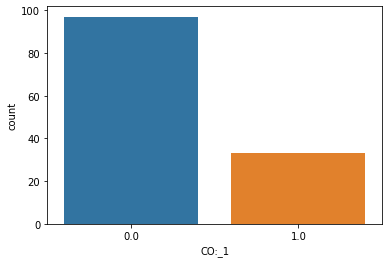

In [74]:
sns.countplot(df_one['CO:_1'])

C:\Users\kitch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CO:_2', ylabel='count'>

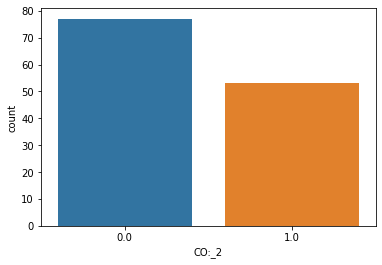

In [75]:
sns.countplot(df_one['CO:_2'])

In [77]:
sm = SMOTE(random_state=42)
X_1, Y_1 = sm.fit_resample(X1, Y_one)

In [78]:
print(Counter(Y_1))

Counter({0.0: 97, 1.0: 97})


In [79]:
Train_X1, Test_X1, Train_Y1, Test_Y1  = model_selection.train_test_split(X_1, Y_1, test_size=0.3,random_state=0)

In [21]:
# model_params = {
#     'svm': {
#         'model': svm.SVC(gamma='auto'),
#         'params' : {
#             'C': [1,5,30,50],
#             'kernel': ['rbf','linear'],
#             'random_state' : [1,5,10]
#         }  
#     },
#     'random_forest': {
#         'model': RandomForestClassifier(),
#         'params' : {
#             'n_estimators': [10,15,20,30,50],
#             'random_state':[1,10,30,4,50,100],
#             'max_depth':[2,3,5]
#         }
#     },
#     'logistic_regression' : {
#         'model': LogisticRegression(solver='liblinear',multi_class='auto'),
#         'params': {
#             'C': [1,5,10,20,50,100]
#         }
#     }
# }
# scores = []

# for model_name, mp in model_params.items():
#     clf1 =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
#     clf1.fit(Train_X1, Train_Y1)
#     scores.append({
#         'model': model_name,
#         'best_score': clf1.best_score_,
#         'best_params': clf1.best_params_
#     })
    
# df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
# df

# 0	svm	0.903704	{'C': 5, 'kernel': 'rbf', 'random_state': 1}
# 1	random_forest	0.896296	{'max_depth': 3, 'n_estimators': 30, 'random_state': 1}
# 2	logistic_regression	0.888889	{'C': 1}


,model,best_score,best_params
0,svm,0.903704,"{'C': 5, 'kernel': 'rbf', 'random_state': 1}"
1,random_forest,0.896296,"{'max_depth': 3, 'n_estimators': 30, 'random_s..."
2,logistic_regression,0.888889,{'C': 1}


In [80]:
sm = SMOTE(random_state=42)
X_2, Y_2 = sm.fit_resample(X1, Y_two)

In [81]:
print(Counter(Y_2))

Counter({1.0: 77, 0.0: 77})


In [82]:
Train_X2, Test_X2, Train_Y2, Test_Y2  = model_selection.train_test_split(X_2, Y_2, test_size=0.3,random_state=0)

In [83]:
# model_params = {
#     'svm': {
#         'model': svm.SVC(gamma='auto'),
#         'params' : {
#             'C': [1,5,30,50],
#             'kernel': ['rbf','linear'],
#             'random_state' : [1,5,10]
#         }  
#     },
#     'random_forest': {
#         'model': RandomForestClassifier(),
#         'params' : {
#             'n_estimators': [10,15,20,30,50],
#             'random_state':[1,10,30,50,100],
#             'max_depth':[2,3,5]
#         }
#     },
#     'logistic_regression' : {
#         'model': LogisticRegression(solver='liblinear',multi_class='auto'),
#         'params': {
#             'C': [1,5,10,20,50,100]
#         }
#     }
# }
# scores = []

# for model_name, mp in model_params.items():
#     clf1 =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
#     clf1.fit(Train_X2, Train_Y2)
#     scores.append({
#         'model': model_name,
#         'best_score': clf1.best_score_,
#         'best_params': clf1.best_params_
#     })
    
# df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
# df

# 0	svm	0.786147	{'C': 1, 'kernel': 'rbf', 'random_state': 1}
# 1	random_forest	0.787296	{'max_depth': 5, 'n_estimators': 30, 'random_state': 10}
# 2	logistic_regression	0.776190	{'C': 100}

In [84]:
df2 = pd.read_csv('Dataset_2_Training.csv',encoding='latin-1')

In [85]:
df2 = df2.T
df2

,0,1,2,3,4,5,6,7,8,9,...,54669,54670,54671,54672,54673,54674,54675,54676,54677,54678
ID_REF,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_54670,gene_54671,gene_54672,gene_54673,gene_54674,gene_54675,CO: 3,CO: 4,CO: 5,CO: 6
Train_001,8.2843,8.7174,8.3019,11.8611,4.6883,9.8524,8.2301,4.8406,7.5667,8.4165,...,6.3546,7.2572,3.608,3.9483,4.52,4.5195,0.0,0.0,1.0,1.0
Train_002,9.0419,8.8729,8.4559,11.2112,5.7059,10.2263,7.9439,4.6463,6.1828,7.0852,...,4.9707,6.4847,5.1648,1.8369,3.8223,3.4288,0.0,0.0,1.0,1.0
Train_003,7.6171,8.3904,8.1184,11.0341,5.805,9.5912,6.8044,4.0878,8.1184,7.3179,...,3.9571,6.2647,3.4216,4.7911,5.491,3.8438,0.0,0.0,0.0,1.0
Train_004,9.6283,8.384,9.9061,12.0571,5.1193,10.5774,8.1628,5.3257,5.6398,7.6829,...,4.6561,7.5776,6.2385,4.1413,5.3047,5.4693,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Train_336,9.7047,8.83,9.9219,11.3773,4.631,9.2819,8.1767,4.886,6.2899,7.3783,...,5.2821,7.2148,4.5927,4.4921,6.76,4.8838,0.0,0.0,1.0,1.0
Train_337,8.721,8.2785,9.2906,11.5624,5.2698,10.1612,8.2234,5.3162,3.4409,7.7313,...,4.0997,6.8786,4.9831,4.0369,7.4033,6.2071,0.0,0.0,0.0,0.0
Train_338,8.8254,7.0345,8.2441,11.2367,7.5746,8.1249,7.4169,5.6091,4.3553,6.4326,...,4.0143,6.5681,4.3391,4.3536,4.5767,6.379,1.0,1.0,1.0,0.0
Train_339,9.6239,8.1774,8.8393,11.4165,4.7859,10.7674,8.423,5.0015,5.4565,8.0588,...,5.959,4.9622,4.8485,5.9161,5.0002,6.1144,0.0,0.0,0.0,1.0


In [86]:
df2 = df2.iloc[1:]
df2_train = df2.iloc[:,-4:]
df2_train.columns = ['CO:_3', 'CO:_4','CO:_5', 'CO:_6']
df2_train.to_csv('Train_Y2.csv')
df2_train

,CO:_3,CO:_4,CO:_5,CO:_6
Train_001,0.0,0.0,1.0,1.0
Train_002,0.0,0.0,1.0,1.0
Train_003,0.0,0.0,0.0,1.0
Train_004,0.0,0.0,0.0,1.0
Train_005,0.0,0.0,0.0,1.0
...,...,...,...,...
Train_336,0.0,0.0,1.0,1.0
Train_337,0.0,0.0,0.0,0.0
Train_338,1.0,1.0,1.0,0.0
Train_339,0.0,0.0,0.0,1.0


In [87]:
df2 = df2.iloc[:, :-4]
df2

,0,1,2,3,4,5,6,7,8,9,...,54665,54666,54667,54668,54669,54670,54671,54672,54673,54674
Train_001,8.2843,8.7174,8.3019,11.8611,4.6883,9.8524,8.2301,4.8406,7.5667,8.4165,...,13.8751,13.6892,14.9731,14.9854,6.3546,7.2572,3.608,3.9483,4.52,4.5195
Train_002,9.0419,8.8729,8.4559,11.2112,5.7059,10.2263,7.9439,4.6463,6.1828,7.0852,...,13.9433,13.7379,15.4476,15.4852,4.9707,6.4847,5.1648,1.8369,3.8223,3.4288
Train_003,7.6171,8.3904,8.1184,11.0341,5.805,9.5912,6.8044,4.0878,8.1184,7.3179,...,12.6765,12.1604,14.2118,14.2404,3.9571,6.2647,3.4216,4.7911,5.491,3.8438
Train_004,9.6283,8.384,9.9061,12.0571,5.1193,10.5774,8.1628,5.3257,5.6398,7.6829,...,14.3774,13.9178,15.7814,15.693,4.6561,7.5776,6.2385,4.1413,5.3047,5.4693
Train_005,10.1735,9.1585,7.9649,11.0843,5.0119,8.7764,8.1379,3.6227,7.7334,7.6336,...,14.534,13.6809,15.7012,15.7815,3.7007,3.872,3.1052,5.4053,5.3599,2.8328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Train_336,9.7047,8.83,9.9219,11.3773,4.631,9.2819,8.1767,4.886,6.2899,7.3783,...,14.3767,13.7808,16.1229,16.1239,5.2821,7.2148,4.5927,4.4921,6.76,4.8838
Train_337,8.721,8.2785,9.2906,11.5624,5.2698,10.1612,8.2234,5.3162,3.4409,7.7313,...,13.9238,13.4413,15.5127,15.5889,4.0997,6.8786,4.9831,4.0369,7.4033,6.2071
Train_338,8.8254,7.0345,8.2441,11.2367,7.5746,8.1249,7.4169,5.6091,4.3553,6.4326,...,13.6982,12.9567,15.3612,15.2798,4.0143,6.5681,4.3391,4.3536,4.5767,6.379
Train_339,9.6239,8.1774,8.8393,11.4165,4.7859,10.7674,8.423,5.0015,5.4565,8.0588,...,13.2825,12.326,14.6929,14.3001,5.959,4.9622,4.8485,5.9161,5.0002,6.1144


In [88]:
X2 = df2.to_numpy() 
X2

array([[8.2843, 8.7174, 8.3019, ..., 3.9483, 4.52, 4.5195],
       [9.0419, 8.8729, 8.4559, ..., 1.8369, 3.8223, 3.4288],
       [7.6171, 8.3904, 8.1184, ..., 4.7911, 5.491, 3.8438],
       ...,
       [8.8254, 7.0345, 8.2441, ..., 4.3536, 4.5767, 6.379],
       [9.6239, 8.1774, 8.8393, ..., 5.9161, 5.0002, 6.1144],
       [8.7021, 9.0997, 8.8444, ..., 3.003, 4.2063, 6.0104]], dtype=object)

In [89]:
df2.to_csv('Train_X2.csv')
df_two = pd.read_csv('Train_Y2.csv',encoding='latin-1')
df_two = df_two.iloc[:,-4:]
df_two

,CO:_3,CO:_4,CO:_5,CO:_6
0,0.0,0.0,1.0,1.0
1,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
335,0.0,0.0,1.0,1.0
336,0.0,0.0,0.0,0.0
337,1.0,1.0,1.0,0.0
338,0.0,0.0,0.0,1.0


In [90]:
Y_three = df_two['CO:_3']
Y_four = df_two['CO:_4']
Y_five = df_two['CO:_5']
Y_six = df_two['CO:_6']


In [91]:
df_two.apply(pd.value_counts)

,CO:_3,CO:_4,CO:_5,CO:_6
0.0,257,289,194,140
1.0,83,51,146,200


C:\Users\kitch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CO:_3', ylabel='count'>

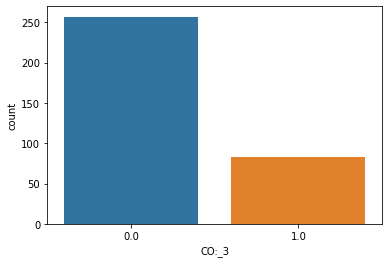

In [93]:
sns.countplot(df_two['CO:_3'])

C:\Users\kitch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CO:_4', ylabel='count'>

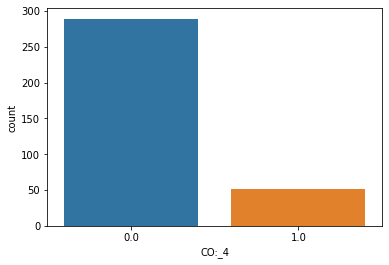

In [94]:
sns.countplot(df_two['CO:_4'])

C:\Users\kitch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CO:_5', ylabel='count'>

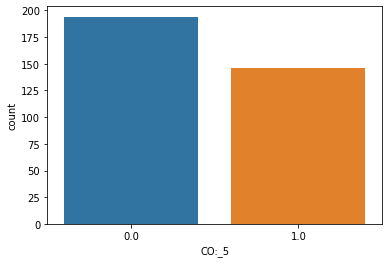

In [95]:
sns.countplot(df_two['CO:_5'])

C:\Users\kitch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CO:_6', ylabel='count'>

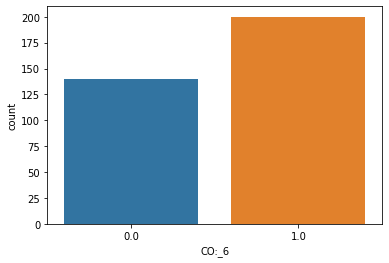

In [96]:
sns.countplot(df_two['CO:_6'])

In [97]:
sm = SMOTE(random_state=42)
X_3, Y_3 = sm.fit_resample(X2, Y_three)

In [98]:
print(Counter(Y_3))

Counter({0.0: 257, 1.0: 257})


In [99]:
Train_X3, Test_X3, Train_Y3, Test_Y3  = model_selection.train_test_split(X_3, Y_3, test_size=0.3,random_state=0)


In [36]:
# model_params = {
#     'svm': {
#         'model': svm.SVC(gamma='auto'),
#         'params' : {
#             'C': [1,5,30,50],
#             'kernel': ['rbf','linear'],
#             'random_state' : [1,5,10]
#         }  
#     },
#     'random_forest': {
#         'model': RandomForestClassifier(),
#         'params' : {
#             'n_estimators': [10,15,20,30,50],
#             'random_state':[1,10,30,50,100],
#             'max_depth':[2,3,5]
#         }
#     },
#     'logistic_regression' : {
#         'model': LogisticRegression(solver='liblinear',multi_class='auto'),
#         'params': {
#             'C': [1,5,10,20,50,100]
#         }
#     }
# }
# scores = []

# for model_name, mp in model_params.items():
#     clf1 =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
#     clf1.fit(Train_X3, Train_Y3)
#     scores.append({
#         'model': model_name,
#         'best_score': clf1.best_score_,
#         'best_params': clf1.best_params_
#     })
    
# df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
# df


# 0	svm	0.921987	{'C': 1, 'kernel': 'linear', 'random_state': 1}
# 1	random_forest	0.846753	{'max_depth': 5, 'n_estimators': 30, 'random_state': 100}
# 2	logistic_regression	0.919210	{'C': 1}

,model,best_score,best_params
0,svm,0.921987,"{'C': 1, 'kernel': 'linear', 'random_state': 1}"
1,random_forest,0.846753,"{'max_depth': 5, 'n_estimators': 30, 'random_s..."
2,logistic_regression,0.919210,{'C': 1}


In [100]:
sm = SMOTE(random_state=42)
X_4, Y_4 = sm.fit_resample(X2, Y_four)

In [101]:
print(Counter(Y_4))

Counter({0.0: 289, 1.0: 289})


In [102]:
Train_X4, Test_X4, Train_Y4, Test_Y4  = model_selection.train_test_split(X_4, Y_4, test_size=0.3,random_state=0)

In [103]:

# model_params = {
#     'svm': {
#         'model': svm.SVC(gamma='auto'),
#         'params' : {
#             'C': [1,5,30,50],
#             'kernel': ['rbf','linear'],
#             'random_state' : [1,5,10]
#         }  
#     },
#     'random_forest': {
#         'model': RandomForestClassifier(),
#         'params' : {
#             'n_estimators': [10,15,20,30,50],
#             'random_state':[1,10,30,50,100],
#             'max_depth':[2,3,5]
#         }
#     },
#     'logistic_regression' : {
#         'model': LogisticRegression(solver='liblinear',multi_class='auto'),
#         'params': {
#             'C': [1,5,10,20,50,100]
#         }
#     }
# }
# scores = []

# for model_name, mp in model_params.items():
#     clf1 =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
#     clf1.fit(Train_X4, Train_Y4)
#     scores.append({
#         'model': model_name,
#         'best_score': clf1.best_score_,
#         'best_params': clf1.best_params_
#     })
    
# df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
# df


# 0	svm	0.977685	{'C': 5, 'kernel': 'rbf', 'random_state': 1}
# 1	random_forest	0.943086	{'max_depth': 5, 'n_estimators': 50, 'random_s...
# 2	logistic_regression	0.972747	{'C': 1}

In [104]:
sm = SMOTE(random_state=42)
X_5, Y_5 = sm.fit_resample(X2, Y_five)

In [105]:
print(Counter(Y_5))

Counter({1.0: 194, 0.0: 194})


In [106]:
Train_X5, Test_X5, Train_Y5, Test_Y5  = model_selection.train_test_split(X_5, Y_5, test_size=0.3,random_state=0)

In [44]:
# model_params = {
#     'svm': {
#         'model': svm.SVC(gamma='auto'),
#         'params' : {
#             'C': [1,5,30,50],
#             'kernel': ['rbf','linear'],
#             'random_state' : [1,5,10]
#         }  
#     },
#     'random_forest': {
#         'model': RandomForestClassifier(),
#         'params' : {
#             'n_estimators': [10,15,20,30,50],
#             'random_state':[1,10,30,50,100],
#             'max_depth':[2,3,5]
#         }
#     },
#     'logistic_regression' : {
#         'model': LogisticRegression(solver='liblinear',multi_class='auto'),
#         'params': {
#             'C': [1,5,10,20,50,100]
#         }
#     }
# }
# scores = []

# for model_name, mp in model_params.items():
#     clf1 =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
#     clf1.fit(Train_X5, Train_Y5)
#     scores.append({
#         'model': model_name,
#         'best_score': clf1.best_score_,
#         'best_params': clf1.best_params_
#     })
    
# df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
# df


# 0	svm	0.885455	{'C': 1, 'kernel': 'linear', 'random_state': 1}
# 1	random_forest	0.878047	{'max_depth': 2, 'n_estimators': 50, 'random_s...
# 2	logistic_regression	0.874411	{'C': 50}

,model,best_score,best_params
0,svm,0.885455,"{'C': 1, 'kernel': 'linear', 'random_state': 1}"
1,random_forest,0.878047,"{'max_depth': 2, 'n_estimators': 50, 'random_s..."
2,logistic_regression,0.874411,{'C': 50}


In [107]:
sm = SMOTE(random_state=42)
X_6, Y_6 = sm.fit_resample(X2, Y_six)

In [108]:
print(Counter(Y_6))

Counter({1.0: 200, 0.0: 200})


In [109]:
Train_X6, Test_X6, Train_Y6, Test_Y6  = model_selection.train_test_split(X_6, Y_6, test_size=0.3,random_state=0)


In [110]:
# model_params = {
#     'svm': {
#         'model': svm.SVC(gamma='auto'),
#         'params' : {
#             'C': [1,5,30,50],
#             'kernel': ['rbf','linear'],
#             'random_state' : [1,5,10]
#         }  
#     },
#     'random_forest': {
#         'model': RandomForestClassifier(),
#         'params' : {
#             'n_estimators': [10,15,20,30,50],
#             'random_state':[1,10,30,50,100],
#             'max_depth':[2,3,5]
#         }
#     },
#     'logistic_regression' : {
#         'model': LogisticRegression(solver='liblinear',multi_class='auto'),
#         'params': {
#             'C': [1,5,10,20,50,100]
#         }
#     }
# }
# scores = []

# for model_name, mp in model_params.items():
#     clf6 =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
#     clf6.fit(Train_X6, Train_Y6)
#     scores.append({
#         'model': model_name,
#         'best_score': clf6.best_score_,
#         'best_params': clf6.best_params_
#     })
    
# df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
# df

# 0	svm	0.689286	{'C': 1, 'kernel': 'linear', 'random_state': 1}
# 1	random_forest	0.657143	{'max_depth': 3, 'n_estimators': 10, 'random_s...
# 2	logistic_regression	0.678571	{'C': 10}

In [122]:
rdf1 = svm.SVC(C=10,kernel='rbf')
rdf1 = rdf1.fit(X1,Y_one)

rdf2 = RandomForestClassifier(n_estimators=5,random_state=40)
rdf2 = rdf2.fit(X1,Y_two)

rdf3 = RandomForestClassifier(n_estimators=50,random_state=20)
rdf3 = rdf3.fit(X2,Y_three)

rdf4 = RandomForestClassifier(n_estimators=15,random_state=10)
rdf4 = rdf4.fit(X2,Y_four)

rdf5 = RandomForestClassifier(n_estimators=100,random_state=1)
rdf5 = rdf5.fit(X2,Y_five)

rdf6 = AdaBoostClassifier(n_estimators=12,learning_rate=0.5)
rdf6 = rdf6.fit(X2,Y_six)


In [123]:
df_test1 = pd.read_csv('Dataset_1_Testing.csv',encoding='latin-1')
df_test2 = pd.read_csv('Dataset_2_Testing.csv',encoding='latin-1')

In [124]:
df_test1 = df_test1.T
df_test2 = df_test2.T
df_test1 = df_test1.iloc[1:]
df_test2 = df_test2.iloc[1:]
X_test1 = df_test1.to_numpy()
X_test2 = df_test2.to_numpy() 

In [125]:
Y_test_CO1=rdf1.predict(X_test1)


In [126]:
Y_test_CO2=rdf2.predict(X_test1)


In [127]:
Y_test_CO3=rdf3.predict(X_test2)
Y_test_CO4=rdf4.predict(X_test2)
Y_test_CO5=rdf5.predict(X_test2)
Y_test_CO6=rdf6.predict(X_test2)


In [128]:
final_array = np.concatenate((Y_test_CO1,Y_test_CO2,Y_test_CO3,Y_test_CO4,Y_test_CO5,Y_test_CO6),axis = 0)
df = pd.DataFrame()
df['Predicted']=final_array
df.insert(0,'Id', df.index)

df.to_csv('CS21M023_CS21M039.csv',index=False)

In [130]:

# These, models gave highest accuracy/score. All clinical descriptors when trained on AdaBoost, whose 
# accuracy was 0.45244 on kaggle


# rdf1 = AdaBoostClassifier(n_estimators=12,learning_rate=0.5,random_state=1)
# rdf1 = rdf1.fit(X1,Y_one)

# rdf2 = AdaBoostClassifier(n_estimators=12,learning_rate=0.5,random_state=1)
# rdf2 = rdf2.fit(X1,Y_two)

# rdf3 = AdaBoostClassifier(n_estimators=12,learning_rate=0.5,random_state=1)
# rdf3 = rdf3.fit(X2,Y_three)

# rdf4 = AdaBoostClassifier(n_estimators=12,learning_rate=0.5,random_state=1)
# rdf4 = rdf4.fit(X2,Y_four)

# rdf5 = AdaBoostClassifier(n_estimators=12,learning_rate=0.5,random_state=1)
# rdf5 = rdf5.fit(X2,Y_five)

# rdf6 = AdaBoostClassifier(n_estimators=12,learning_rate=0.5,random_state=1)
# rdf6 = rdf6.fit(X2,Y_six)
